In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
# X_train_full.shape
# X_train_full.dtype

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
# class_names[y_train[0]]

'Coat'

In [19]:
# Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
# model.layers

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30,
... validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.7107 - accuracy: 0.7698 - val_loss: 0.4924 - val_accuracy: 0.8382
Epoch 2/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.4874 - accuracy: 0.8308 - val_loss: 0.4686 - val_accuracy: 0.8388
Epoch 3/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.4421 - accuracy: 0.8463 - val_loss: 0.4165 - val_accuracy: 0.8576
Epoch 4/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.4148 - accuracy: 0.8543 - val_loss: 0.4078 - val_accuracy: 0.8640
Epoch 5/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.3952 - accuracy: 0.8611 - val_loss: 0.3956 - val_accuracy: 0.8640
Epoch 6/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.3788 - accuracy: 0.8667 - val_loss: 0.3888 - val_accuracy: 0.8670
Epoch 7/30
55000/55000 [==============================] -

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

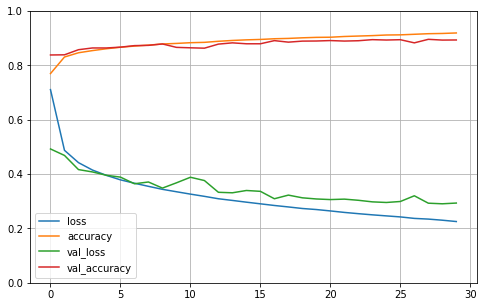

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [29]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 73.0604 - accuracy: 0.8376


[73.06043301401138, 0.8376]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [39]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 36us/sample - loss: 10638131028210804736.0000 - val_loss: 16206163460697.1699
Epoch 2/20
11610/11610 [==============================] - 0s 24us/sample - loss: 1127983027283.8145 - val_loss: 6915418.5463
Epoch 3/20
11610/11610 [==============================] - 0s 24us/sample - loss: 481323.6920 - val_loss: 4.3538
Epoch 4/20
11610/11610 [==============================] - 0s 26us/sample - loss: 1.5544 - val_loss: 1.2956
Epoch 5/20
11610/11610 [==============================] - 0s 23us/sample - loss: 1.3461 - val_loss: 1.2943
Epoch 6/20
11610/11610 [==============================] - 0s 23us/sample - loss: 1.3464 - val_loss: 1.2947
Epoch 7/20
11610/11610 [==============================] - 0s 24us/sample - loss: 1.3462 - val_loss: 1.2970
Epoch 8/20
11610/11610 [==============================] - 0s 23us/sample - loss: 1.3465 - val_loss: 1.2944
Epoch 9/20
11610/11610 [================

In [40]:
y_pred = model.predict(X_new)

In [41]:
y_pred

array([[2.078931],
       [2.078931],
       [2.078931]], dtype=float32)

In [45]:
# Functional API
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [49]:
model.compile(loss="mse", optimizer="sgd")

In [50]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [52]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))


ValueError: Error when checking input: expected input_3 to have shape (8,) but got array with shape (5,)

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))